In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
emprestimo_acervo = pd.read_parquet('../dia_3_analise_e_date_time/emprestimo_acervo/emprestimo_acervo.parquet')
emprestimo_acervo.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU
0,709684,L095049,None,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas.
1,709685,L167050,None,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas.
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,200721119.0,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,Ciências aplicadas.
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2009045971.0,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,Ciências aplicadas.


In [127]:
# Alunos de graduação
dados_filtrados = emprestimo_acervo.query("tipo_vinculo_usuario == 'ALUNO DE GRADUAÇÃO'")
contagem = dados_filtrados['colecao'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

colecao_graduacao = pd.DataFrame({
    'contagem': contagem,
    'porcentagem': porcentagem.round(2)
})

colecao_graduacao

,contagem,porcentagem
colecao,,
Acervo Circulante,1600155,99.25
Multimeios,4652,0.29
Monografias,3572,0.22
Dissertações,1152,0.07
Obras de Referência,1047,0.06
Publicações de Autores do RN,595,0.04
Publicações da UFRN,466,0.03
Teses,245,0.02
Folhetos,180,0.01


In [128]:
emprestimo_acervo['data_emprestimo'] = pd.to_datetime(emprestimo_acervo['data_emprestimo'])
emprestimo_acervo['data_emprestimo'].dtypes

dtype('<M8[ns]')

In [129]:
# Empréstimo feito por alunos de graduação do acervo circulante
dados_filtrados = emprestimo_acervo.query("tipo_vinculo_usuario == 'ALUNO DE GRADUAÇÃO' and colecao == 'Acervo Circulante'").copy()

dados_filtrados['ano'] = dados_filtrados['data_emprestimo'].dt.year
dados_filtrados['mes'] = dados_filtrados['data_emprestimo'].dt.month

graduacao_acervo = (
    dados_filtrados.groupby(['ano', 'mes'])
    .size()
    .reset_index(name = 'quantidade')
    .sort_values(['ano', 'mes'])
)

graduacao_acervo

,ano,mes,quantidade
0,2010,1,2996
1,2010,2,7769
2,2010,3,15275
3,2010,4,12430
4,2010,5,12164
...,...,...,...
118,2019,11,8807
119,2019,12,1980
120,2020,1,1781
121,2020,2,8138


In [132]:
def gerar_boxplot(dados, titulo, subtitulo):

    sns.set_theme(style="darkgrid")

    ax = sns.boxplot(
        x = 'ano',
        y = 'quantidade',
        data = dados
    )

    ax.set_title(titulo+"\n",size=16,loc='left',weight='bold')
    ax.text(s=subtitulo,x=-0.5,y=max(dados['quantidade'])*1.08,fontsize=12, ha='left',color='gray')  
    ax.set_xlabel(None)
    ax.set_ylabel(None)

    plt.tight_layout()
    plt.show()

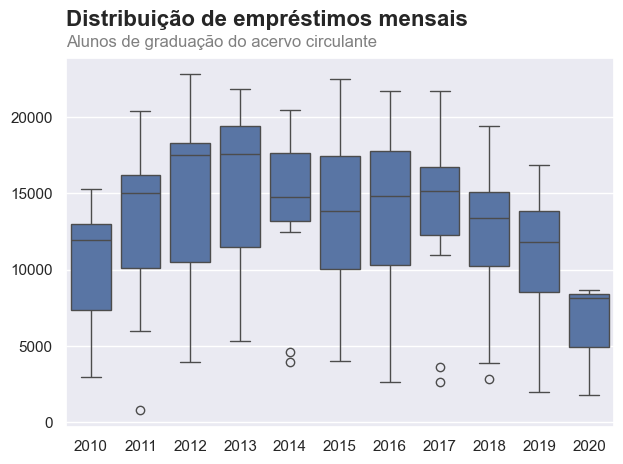

In [ ]:
gerar_boxplot(graduacao_acervo, "Distribuição de empréstimos mensais", "Alunos de graduação do acervo circulante")

# O ano 2013 foi a última alta, após isso houve uma pequena queda em 2014 mas que se manteve até 2016.
# A partir de 2017 a queda foi drástica.
# 2014 e 2017 se destacam com os outliers, provavelmente sendo janeiro e dezembro que se fossem desconsiderados esse dois anos
# teriam um resultado bastante estável.

In [134]:
dados_filtrados = emprestimo_acervo.query('tipo_vinculo_usuario == "ALUNO DE PÓS-GRADUAÇÃO"')
contagem = dados_filtrados['colecao'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

colecao_pos = pd.DataFrame({
    'contagem': contagem,
    'porcentagem': porcentagem.round(2) 
})

colecao_pos

,contagem,porcentagem
colecao,,
Acervo Circulante,299201,98.90
Dissertações,934,0.31
Obras de Referência,700,0.23
Multimeios,559,0.18
Teses,367,0.12
Monografias,278,0.09
Publicações de Autores do RN,204,0.07
Publicações da UFRN,121,0.04
Folhetos,60,0.02


In [135]:
dados_filtrados = emprestimo_acervo.query("tipo_vinculo_usuario == 'ALUNO DE PÓS-GRADUAÇÃO' and colecao == 'Acervo Circulante'").copy()

dados_filtrados['ano'] = emprestimo_acervo['data_emprestimo'].dt.year
dados_filtrados['mes'] = emprestimo_acervo['data_emprestimo'].dt.month

pos_acervo = (
    dados_filtrados.groupby(['ano', 'mes'])
    .size()
    .reset_index(name = 'quantidade')
    .sort_values(['ano', 'mes'])
)

pos_acervo

,ano,mes,quantidade
0,2010,1,1105
1,2010,2,1474
2,2010,3,2919
3,2010,4,2716
4,2010,5,2514
...,...,...,...
119,2019,12,1069
120,2020,1,1143
121,2020,2,1189
122,2020,3,1471


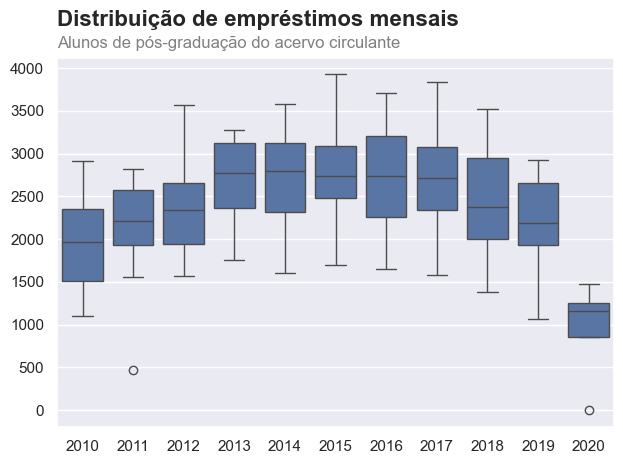

In [ ]:
gerar_boxplot(pos_acervo, "Distribuição de empréstimos mensais", "Alunos de pós-graduação do acervo circulante")

# Diferente dos alunos de graduação, os alunos de pós se mantiveram estáveis até 2018 onde 2016 foi a última alta.
# 2019 já teve um rendimento abaixo, provavelmente 2020 e anos seguintes continuem essa tendência.
# Seria isso um reflexo da alta de 2013 dos alunos de graduação e que após isso fizeram a pós, e que agora está começando a refletir
# de que indicativo dos alunos de graduação pode ser uma previsão do comportamento dos alunos de pós.
# Tudo isso pode levar a outros questionamentos. Teria uma queda no quadro de alunos?